In [103]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn import metrics

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# from nltk.tokenize import word_tokenize
import re

In [2]:
# Import data
df = pd.read_csv('../data/data_cleaned.csv')

In [3]:
df.head()

,text,subreddit,length,word_count
0,I recently dropped out of college from a nursi...,SoftwareEngineering,282,53
1,"Hey everyone,\n\nI've been wondering if there'...",SoftwareEngineering,679,111
2,what are the public spanish universities that ...,SoftwareEngineering,94,14
3,"So I am building an app like omegle, and I was...",SoftwareEngineering,165,31
4,"In every team I have worked until now, I never...",SoftwareEngineering,682,128


In [4]:
df.isnull().sum()

text          0
subreddit     0
length        0
word_count    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14673 entries, 0 to 14672
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        14673 non-null  object
 1   subreddit   14673 non-null  object
 2   length      14673 non-null  int64 
 3   word_count  14673 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 458.7+ KB


In [6]:
df['subreddit'].value_counts(normalize = True)

datascience            0.544606
SoftwareEngineering    0.455394
Name: subreddit, dtype: float64

In [7]:
# Top words analysis
cv = CountVectorizer(stop_words = 'english')

In [8]:
ds_vect = cv.fit_transform(df[df['subreddit'] == 'datascience']['text'])

In [9]:
ds_vect

<7991x15410 sparse matrix of type '<class 'numpy.int64'>'
	with 149639 stored elements in Compressed Sparse Row format>

In [10]:
ds_vect_df = pd.DataFrame(ds_vect.todense(), columns = cv.get_feature_names_out())

In [11]:
ds_vect_df

,00,000,0001763,001,003,01,016,01763,019,01uyov5civlzfqvdwwpk3a,...,zoom,zooms,zp8kep,zuck,zuckerberg,zuora,zx7cr,zyhvh,área,áreas
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
ds_vect_df.sum().sort_values(ascending = False)[: 20]

data          6873
science       2568
like          1383
job           1069
work          1068
amp           1052
time          1023
just           942
https          936
know           873
learning       860
python         795
use            763
want           749
ve             732
ds             725
model          723
scientist      695
help           661
experience     646
dtype: int64

In [13]:
se_vect = cv.fit_transform(df[df['subreddit'] == 'SoftwareEngineering']['text'])

In [14]:
se_vect

<6682x11380 sparse matrix of type '<class 'numpy.int64'>'
	with 81129 stored elements in Compressed Sparse Row format>

In [15]:
se_vect_df = pd.DataFrame(se_vect.todense(), columns = cv.get_feature_names_out())

In [16]:
se_vect_df

,00,000,0009,0012,00gzsj1yuhna1,00pm,00s,01,0109,01_input_output_side_effects,...,𝐨𝐟,𝐭𝐞𝐜𝐡𝐧𝐨𝐥𝐨𝐠𝐲,𝐭𝐫𝐚𝐢𝐧𝐢𝐧𝐠,𝘽𝙞𝙧𝙙,𝙀𝙖𝙧𝙡𝙮,𝙀𝙣𝙙𝙞𝙣𝙜,𝙊𝙛𝙛𝙚𝙧,𝙎𝙤𝙤𝙣,𝙎𝙥𝙚𝙘𝙞𝙖𝙡,𝟒𝟎
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6677,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6679,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
se_vect_df.sum().sort_values(ascending = False)[: 20]

software       2342
engineering     938
like            649
code            639
engineer        613
work            504
job             501
know            462
just            457
need            427
help            414
amp             412
time            409
development     408
want            381
https           363
use             359
new             359
looking         349
good            343
dtype: int64

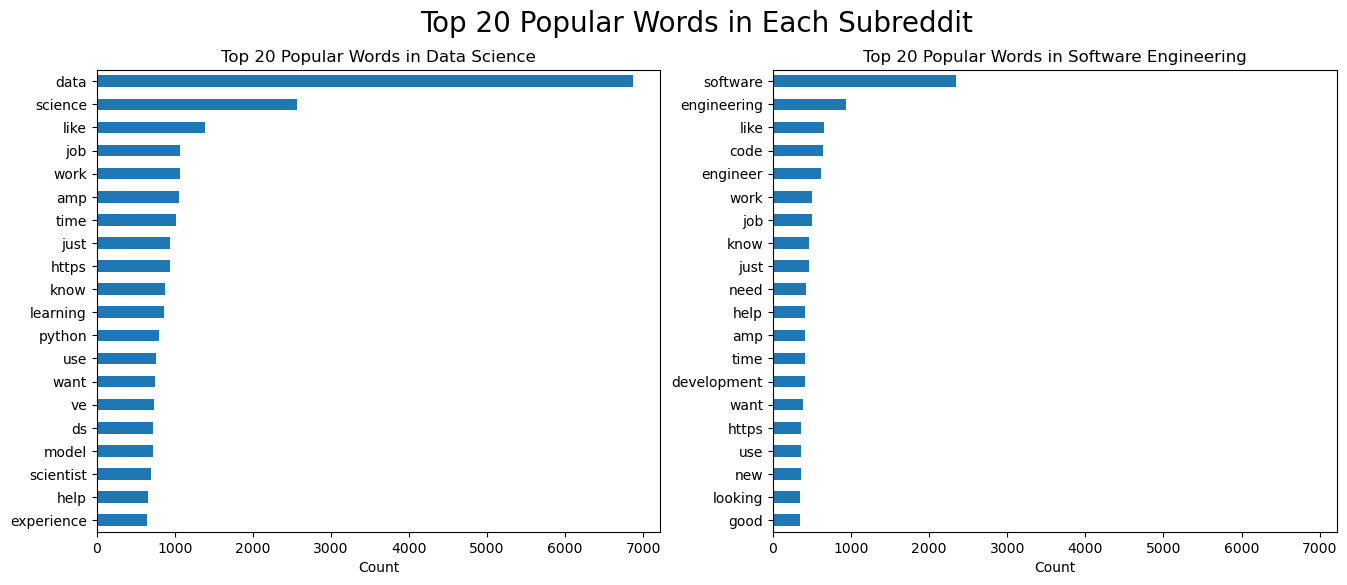

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6), sharex = True)

ds_vect_df.sum().sort_values(ascending = False).head(20).plot(kind = 'barh', ax = ax[0])
se_vect_df.sum().sort_values(ascending = False).head(20).plot(kind = 'barh', ax = ax[1])

ax[0].set(title = 'Top 20 Popular Words in Data Science', xlabel = 'Count')
ax[1].set(title = 'Top 20 Popular Words in Software Engineering', xlabel = 'Count')

ax[0].invert_yaxis()
ax[1].invert_yaxis()

fig.suptitle('Top 20 Popular Words in Each Subreddit', fontsize = 20);

In [19]:
# Top Bigrams Analysis
cv_big = CountVectorizer(ngram_range = (2, 2))

In [20]:
ds_vect_big = cv_big.fit_transform(df[df['subreddit'] == 'datascience']['text'])
ds_vect_big_df = pd.DataFrame(ds_vect_big.todense(), columns = cv_big.get_feature_names_out())

In [21]:
se_vect_big = cv_big.fit_transform(df[df['subreddit'] == 'SoftwareEngineering']['text'])
se_vect_big_df = pd.DataFrame(se_vect_big.todense(), columns = cv_big.get_feature_names_out())

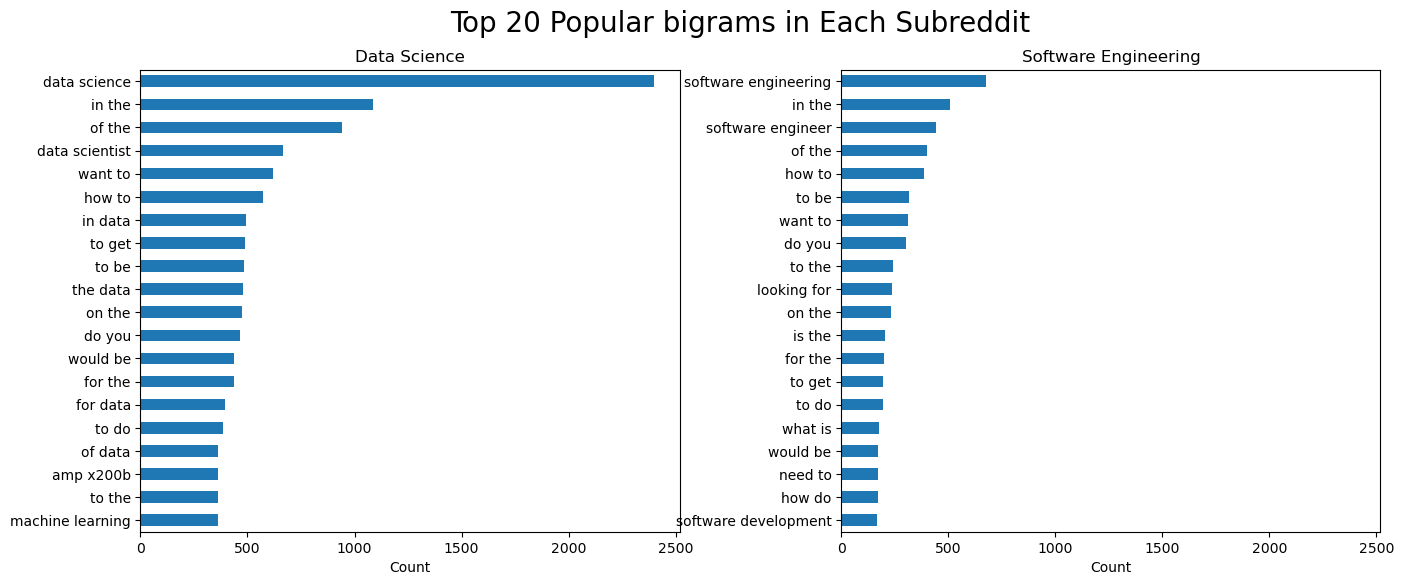

In [22]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6), sharex = True)
plt.subplots_adjust(wspace=0.3)

ds_vect_big_df.sum().sort_values(ascending = False).head(20).plot(kind = 'barh', ax = ax[0])
se_vect_big_df.sum().sort_values(ascending = False).head(20).plot(kind = 'barh', ax = ax[1])

ax[0].set(title = 'Data Science', xlabel = 'Count')
ax[1].set(title = 'Software Engineering', xlabel = 'Count')

ax[0].invert_yaxis()
ax[1].invert_yaxis()

fig.suptitle('Top 20 Popular bigrams in Each Subreddit', fontsize = 20);

In [23]:
# Let's do some more sophisticated stopwords and lemmatizing
def my_lemmatizer(text):
    wnet = WordNetLemmatizer()
    return [wnet.lemmatize(w) for w in text.split()]

In [24]:
wnet = WordNetLemmatizer()
lem_stopwords = [wnet.lemmatize(w) for w in stopwords.words('english')]

In [25]:
print(lem_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'it', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'wa', 'were', 'be', 'been', 'being', 'have', 'ha', 'had', 'having', 'do', 'doe', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'a', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too',

In [26]:
for word in ds_vect_df.sum().sort_values(ascending = False).head(20).index:
    if wnet.lemmatize(word) in lem_stopwords:
        print(word)

just
ve
ds


In [27]:
for word in se_vect_df.sum().sort_values(ascending = False).head(20).index:
    if wnet.lemmatize(word) in lem_stopwords:
        print(word)

just


In [28]:
# Vectorize text with nlkt stopwords and lemmatizing
cv_nltk = CountVectorizer(stop_words = lem_stopwords, 
                         tokenizer = my_lemmatizer)
ds_vect_nltk = cv_nltk.fit_transform(df[df['subreddit'] == 'datascience']['text'])
ds_vect_nltk_df = pd.DataFrame(ds_vect_nltk.todense(), columns = cv_nltk.get_feature_names_out())
se_vect_nltk = cv_nltk.fit_transform(df[df['subreddit'] == 'SoftwareEngineering']['text'])
se_vect_nltk_df = pd.DataFrame(se_vect_nltk.todense(), columns = cv_nltk.get_feature_names_out())

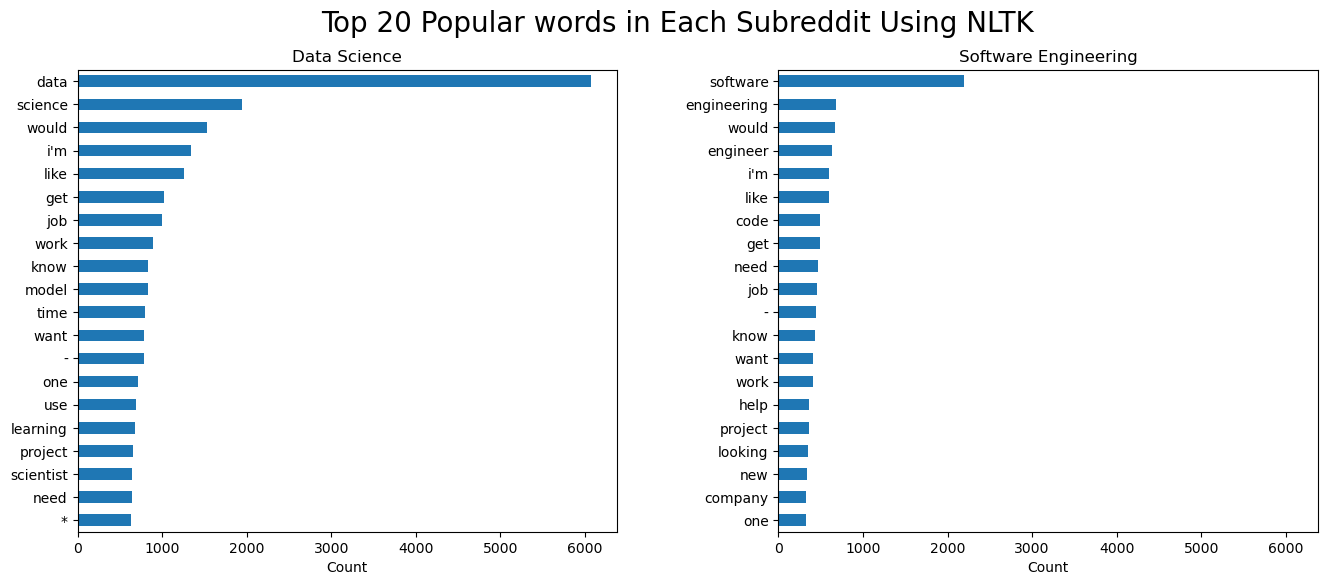

In [29]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6), sharex = True)
plt.subplots_adjust(wspace=0.3)

ds_vect_nltk_df.sum().sort_values(ascending = False).head(20).plot(kind = 'barh', ax = ax[0])
se_vect_nltk_df.sum().sort_values(ascending = False).head(20).plot(kind = 'barh', ax = ax[1])

ax[0].set(title = 'Data Science', xlabel = 'Count')
ax[1].set(title = 'Software Engineering', xlabel = 'Count')

ax[0].invert_yaxis()
ax[1].invert_yaxis()

fig.suptitle('Top 20 Popular words in Each Subreddit Using NLTK', fontsize = 20);

In [30]:
# Custom preprocessor
def my_preprocessor(text):
    text = text.lower()
    text = text.strip()
    text = re.sub('\\n', '', text)
    text = re.findall("[a-zA-Z0-9']+", text)
    text = ' '.join(text)
    
    return text

In [31]:
# Vectorize text with nlkt stopwords and lemmatizing
cv_nltk_all = CountVectorizer(stop_words = lem_stopwords, 
                             tokenizer = my_lemmatizer,
                             preprocessor = my_preprocessor)
ds_vect_nltk_all = cv_nltk_all.fit_transform(df[df['subreddit'] == 'datascience']['text'])
ds_vect_nltk_all_df = pd.DataFrame(ds_vect_nltk_all.todense(), columns = cv_nltk_all.get_feature_names_out())
se_vect_nltk_all = cv_nltk_all.fit_transform(df[df['subreddit'] == 'SoftwareEngineering']['text'])
se_vect_nltk_all_df = pd.DataFrame(se_vect_nltk_all.todense(), columns = cv_nltk_all.get_feature_names_out())

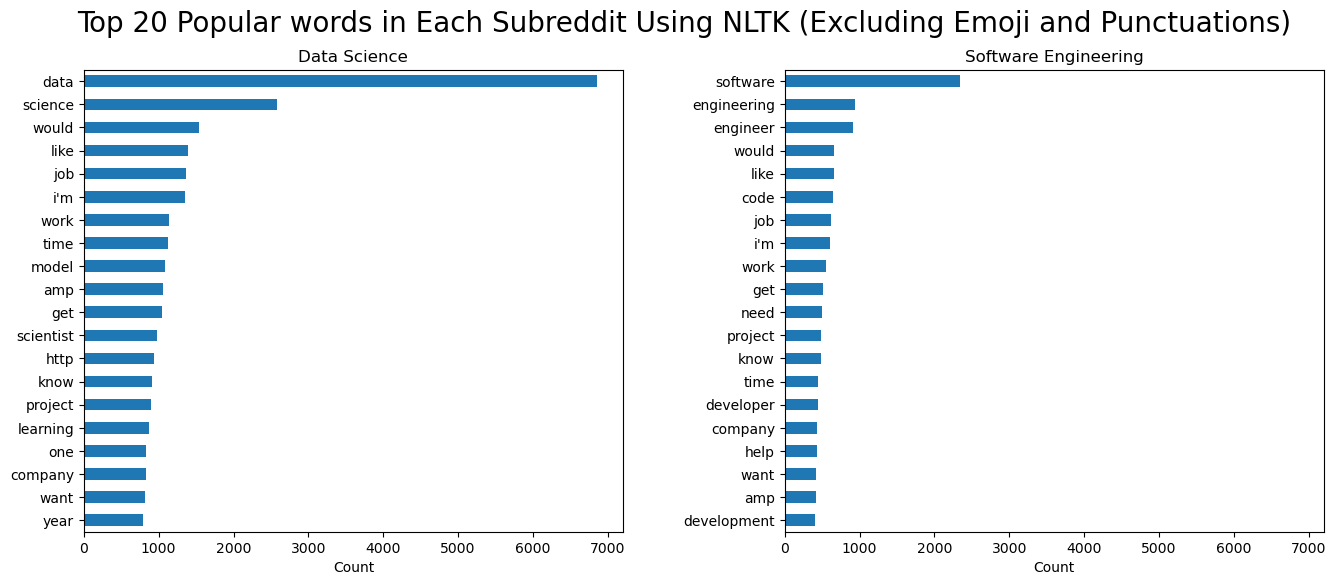

In [32]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6), sharex = True)
plt.subplots_adjust(wspace=0.3)

ds_vect_nltk_all_df.sum().sort_values(ascending = False).head(20).plot(kind = 'barh', ax = ax[0])
se_vect_nltk_all_df.sum().sort_values(ascending = False).head(20).plot(kind = 'barh', ax = ax[1])

ax[0].set(title = 'Data Science', xlabel = 'Count')
ax[1].set(title = 'Software Engineering', xlabel = 'Count')

ax[0].invert_yaxis()
ax[1].invert_yaxis()

fig.suptitle('Top 20 Popular words in Each Subreddit Using NLTK (Excluding Emoji and Punctuations)', fontsize = 20);

In [33]:
# When I check the popular words, I found there are many similar words in both subreddit. So I add top common words in the stop words list.
for stop in ds_vect_nltk_all_df.sum().sort_values(ascending = False).head(30).index:
    if stop in se_vect_nltk_all_df.sum().sort_values(ascending = False).head(30).index:
        lem_stopwords.append(stop)

In [34]:
print(lem_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'it', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'wa', 'were', 'be', 'been', 'being', 'have', 'ha', 'had', 'having', 'do', 'doe', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'a', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too',

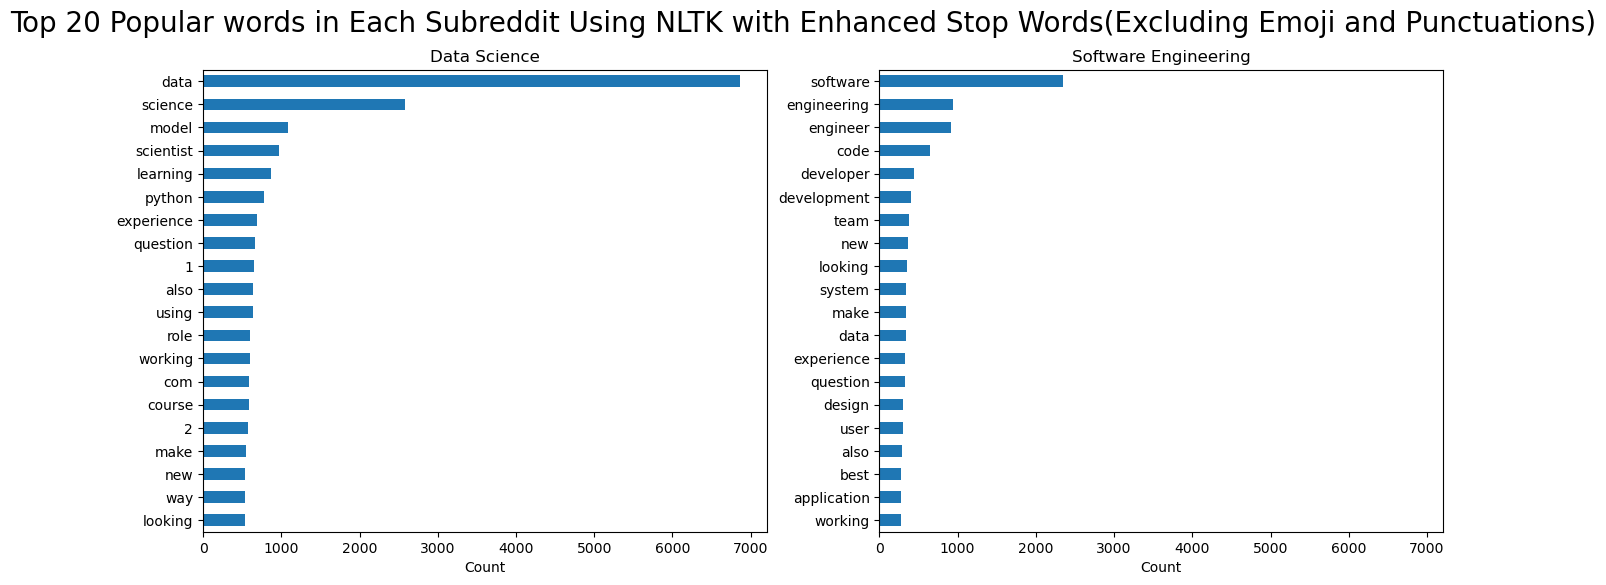

In [35]:
cv_nltk_all = CountVectorizer(stop_words = lem_stopwords, 
                             tokenizer = my_lemmatizer,
                             preprocessor = my_preprocessor)
ds_vect_nltk_all = cv_nltk_all.fit_transform(df[df['subreddit'] == 'datascience']['text'])
ds_vect_nltk_all_df = pd.DataFrame(ds_vect_nltk_all.todense(), columns = cv_nltk_all.get_feature_names_out())
se_vect_nltk_all = cv_nltk_all.fit_transform(df[df['subreddit'] == 'SoftwareEngineering']['text'])
se_vect_nltk_all_df = pd.DataFrame(se_vect_nltk_all.todense(), columns = cv_nltk_all.get_feature_names_out())

fig, ax = plt.subplots(1, 2, figsize = (16, 6), sharex = True)
#plt.subplots_adjust(wspace=0.3)

ds_vect_nltk_all_df.sum().sort_values(ascending = False).head(20).plot(kind = 'barh', ax = ax[0])
se_vect_nltk_all_df.sum().sort_values(ascending = False).head(20).plot(kind = 'barh', ax = ax[1])

ax[0].set(title = 'Data Science', xlabel = 'Count')
ax[1].set(title = 'Software Engineering', xlabel = 'Count')

ax[0].invert_yaxis()
ax[1].invert_yaxis()

fig.suptitle('Top 20 Popular words in Each Subreddit Using NLTK with Enhanced Stop Words(Excluding Emoji and Punctuations)', fontsize = 20);

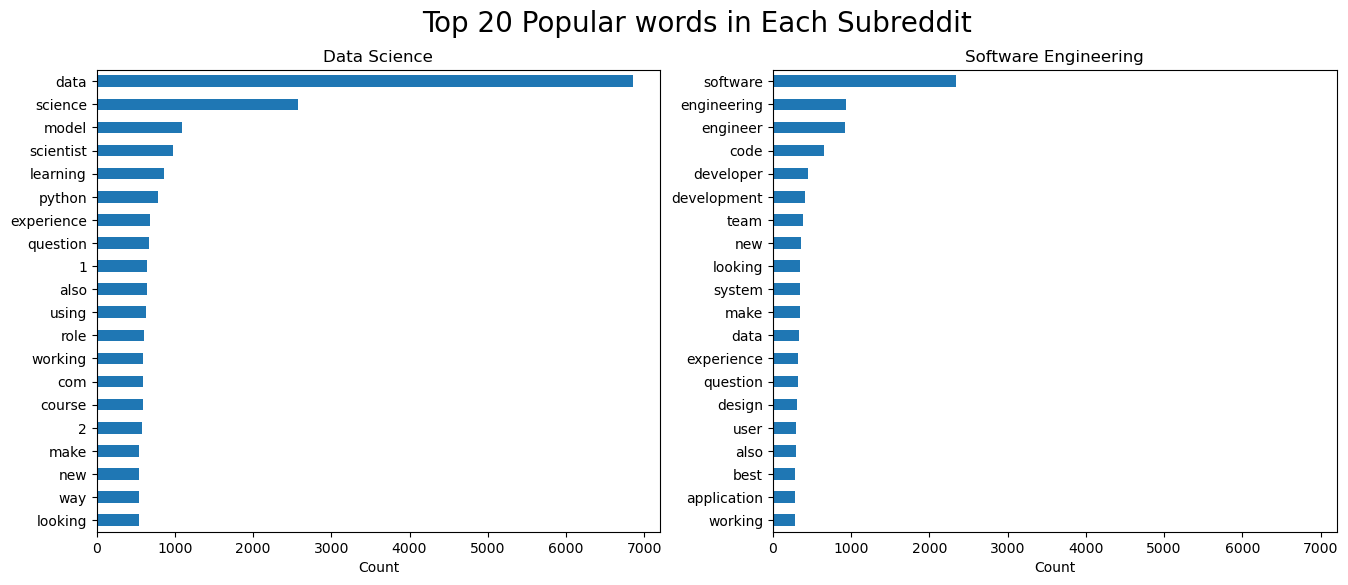

In [36]:
# Slides
cv_nltk_all = CountVectorizer(stop_words = lem_stopwords, 
                             tokenizer = my_lemmatizer,
                             preprocessor = my_preprocessor)
ds_vect_nltk_all = cv_nltk_all.fit_transform(df[df['subreddit'] == 'datascience']['text'])
ds_vect_nltk_all_df = pd.DataFrame(ds_vect_nltk_all.todense(), columns = cv_nltk_all.get_feature_names_out())
se_vect_nltk_all = cv_nltk_all.fit_transform(df[df['subreddit'] == 'SoftwareEngineering']['text'])
se_vect_nltk_all_df = pd.DataFrame(se_vect_nltk_all.todense(), columns = cv_nltk_all.get_feature_names_out())

fig, ax = plt.subplots(1, 2, figsize = (16, 6), sharex = True)
#plt.subplots_adjust(wspace=0.3)

ds_vect_nltk_all_df.sum().sort_values(ascending = False).head(20).plot(kind = 'barh', ax = ax[0])
se_vect_nltk_all_df.sum().sort_values(ascending = False).head(20).plot(kind = 'barh', ax = ax[1])

ax[0].set(title = 'Data Science', xlabel = 'Count')
ax[1].set(title = 'Software Engineering', xlabel = 'Count')

ax[0].invert_yaxis()
ax[1].invert_yaxis()

fig.suptitle('Top 20 Popular words in Each Subreddit', fontsize = 20)
plt.savefig(f'../graphs/top_20_popular_words');

# Create X and y

In [37]:
# Apply lemmatizer and processor for X to reduce grid time later.
X = df['text'].apply(lambda x: ' '.join(my_lemmatizer(x))).apply(my_preprocessor)

y = df['subreddit']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2023, stratify = y)

# Model Building

### Use Logistic model with CountVectorizer vs. TifidfVectorize

In [39]:
# Create Pipeline for model building
pipe_lgr = Pipeline(steps = [
    ('vec', CountVectorizer()),
    ('model', LogisticRegression(solver = 'saga'))
])

In [40]:
pipe_lgr.get_params()

{'memory': None,
 'steps': [('vec', CountVectorizer()),
  ('model', LogisticRegression(solver='saga'))],
 'verbose': False,
 'vec': CountVectorizer(),
 'model': LogisticRegression(solver='saga'),
 'vec__analyzer': 'word',
 'vec__binary': False,
 'vec__decode_error': 'strict',
 'vec__dtype': numpy.int64,
 'vec__encoding': 'utf-8',
 'vec__input': 'content',
 'vec__lowercase': True,
 'vec__max_df': 1.0,
 'vec__max_features': None,
 'vec__min_df': 1,
 'vec__ngram_range': (1, 1),
 'vec__preprocessor': None,
 'vec__stop_words': None,
 'vec__strip_accents': None,
 'vec__token_pattern': '(?u)\\b\\w\\w+\\b',
 'vec__tokenizer': None,
 'vec__vocabulary': None,
 'model__C': 1.0,
 'model__class_weight': None,
 'model__dual': False,
 'model__fit_intercept': True,
 'model__intercept_scaling': 1,
 'model__l1_ratio': None,
 'model__max_iter': 100,
 'model__multi_class': 'auto',
 'model__n_jobs': None,
 'model__penalty': 'l2',
 'model__random_state': None,
 'model__solver': 'saga',
 'model__tol': 0.0001

In [41]:
pipe_lgr_params = {
    'vec': [TfidfVectorizer(stop_words = lem_stopwords), CountVectorizer(stop_words = lem_stopwords)],
    # 'vec__stop_words': [lem_stopwords],
    'vec__ngram_range': [(1, 1), (2, 2)],
    'vec__max_features': [3000, 4000],
    'vec__min_df': [2, 5],
    'vec__max_df': [1.0, 0.8],
    'model__penalty': ['l1', 'l2', 'elasticnet'],
    # 'model__solver': ['saga'],
    # 'model__max_iter': [600]
    # 'model__C': np.logspace(-4, 4, 20)
}

In [42]:
gs_lgr = GridSearchCV(pipe_lgr, 
                      param_grid = pipe_lgr_params,
                      cv = 5,
                      verbose = 1,
                      # n_jobs = -1
                        )

In [43]:
gs_lgr.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


/Users/ranma/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ranma/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ranma/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ranma/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ranma/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ranma/opt/anaconda3/lib/python3.9/site-pack

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vec', CountVectorizer()),
                                       ('model',
                                        LogisticRegression(solver='saga'))]),
             param_grid={'model__penalty': ['l1', 'l2', 'elasticnet'],
                         'vec': [TfidfVectorizer(max_features=4000, min_df=2,
                                                 stop_words=['i', 'me', 'my',
                                                             'myself', 'we',
                                                             'our', 'ours',
                                                             'ourselves', 'you',
                                                             "you're", "you've",
                                                             "you'll", "you'd",
                                                             'your', 'yours',
                                                             'yourself...
             

In [44]:
gs_lgr.best_estimator_

Pipeline(steps=[('vec',
                 TfidfVectorizer(max_features=4000, min_df=2,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'it', 'itself', ...])),
                ('model', LogisticRegression(solver='saga'))])

In [45]:
gs_lgr.best_params_

{'model__penalty': 'l2',
 'vec': TfidfVectorizer(max_features=4000, min_df=2,
                 stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                             'ourselves', 'you', "you're", "you've", "you'll",
                             "you'd", 'your', 'yours', 'yourself', 'yourselves',
                             'he', 'him', 'his', 'himself', 'she', "she's",
                             'her', 'hers', 'herself', 'it', "it's", 'it',
                             'itself', ...]),
 'vec__max_df': 1.0,
 'vec__max_features': 4000,
 'vec__min_df': 2,
 'vec__ngram_range': (1, 1)}

In [46]:
gs_lgr.best_score_

0.8463300152823097

In [47]:
gs_lgr.score(X_train, y_train), gs_lgr.score(X_test, y_test)

(0.906034169392948, 0.8430089942763695)

In [48]:
# gs_lgr.cv_results_

In [49]:
lgr_preds = gs_lgr.predict(X_test)

In [50]:
confusion_matrix(y_test, lgr_preds)

array([[1413,  258],
       [ 318, 1680]])

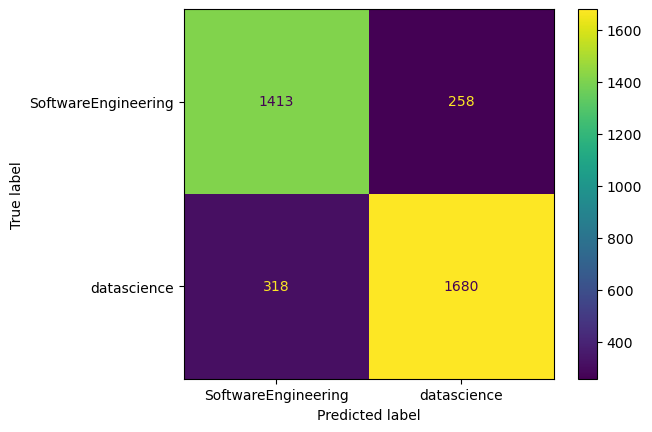

In [51]:
ConfusionMatrixDisplay.from_estimator(gs_lgr, X_test, y_test);

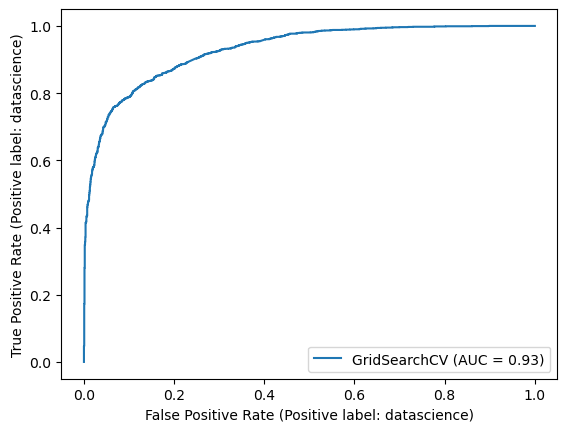

In [52]:
RocCurveDisplay.from_estimator(gs_lgr, X_test, y_test);

In [53]:
gs_lgr.best_estimator_.named_steps['vec'].get_feature_names_out()

array(['00', '000', '001', ..., 'zip', 'zipcode', 'zoom'], dtype=object)

In [54]:
gs_lgr.best_estimator_.named_steps['model'].coef_

array([[-0.15810061,  0.37490428,  0.06357192, ...,  0.44543768,
        -0.00627758, -0.38267408]])

In [55]:
coef_features = pd.DataFrame(gs_lgr.best_estimator_.named_steps['model'].coef_[0],
                             index = gs_lgr.best_estimator_.named_steps['vec'].get_feature_names_out(), 
                             columns = ['coefficient'])

In [56]:
features_top_coef = coef_features.sort_values('coefficient', ascending = False)[: 10]

features_top_coef

,coefficient
data,10.372123
ds,6.405605
science,5.035043
model,4.701602
scientist,3.834196
ml,3.591815
sql,3.447619
analytics,3.298207
dataset,3.135462
regression,2.636784


In [57]:
features_bot_coef = coef_features.sort_values('coefficient')[: 10]

features_bot_coef

,coefficient
software,-8.346478
engineering,-3.698786
swe,-3.293218
developer,-3.225972
engineer,-3.039841
programming,-2.958856
crack,-2.800765
code,-2.701845
development,-2.665548
design,-2.664090


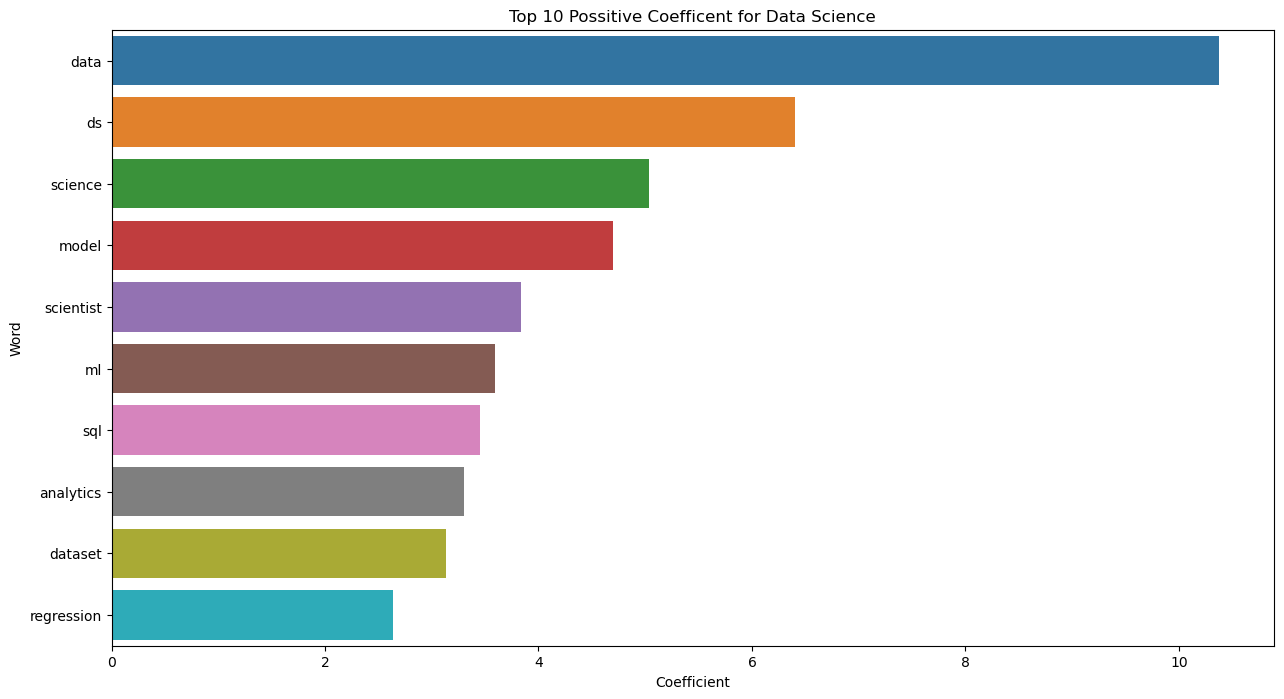

In [58]:
plt.figure(figsize = (15, 8))
sns.barplot(x = features_top_coef.coefficient, y = features_top_coef.index)
plt.title('Top 10 Possitive Coefficent for Data Science')
plt.xlabel('Coefficient')
plt.ylabel('Word')
plt.savefig('../graphs/top_10_coef');

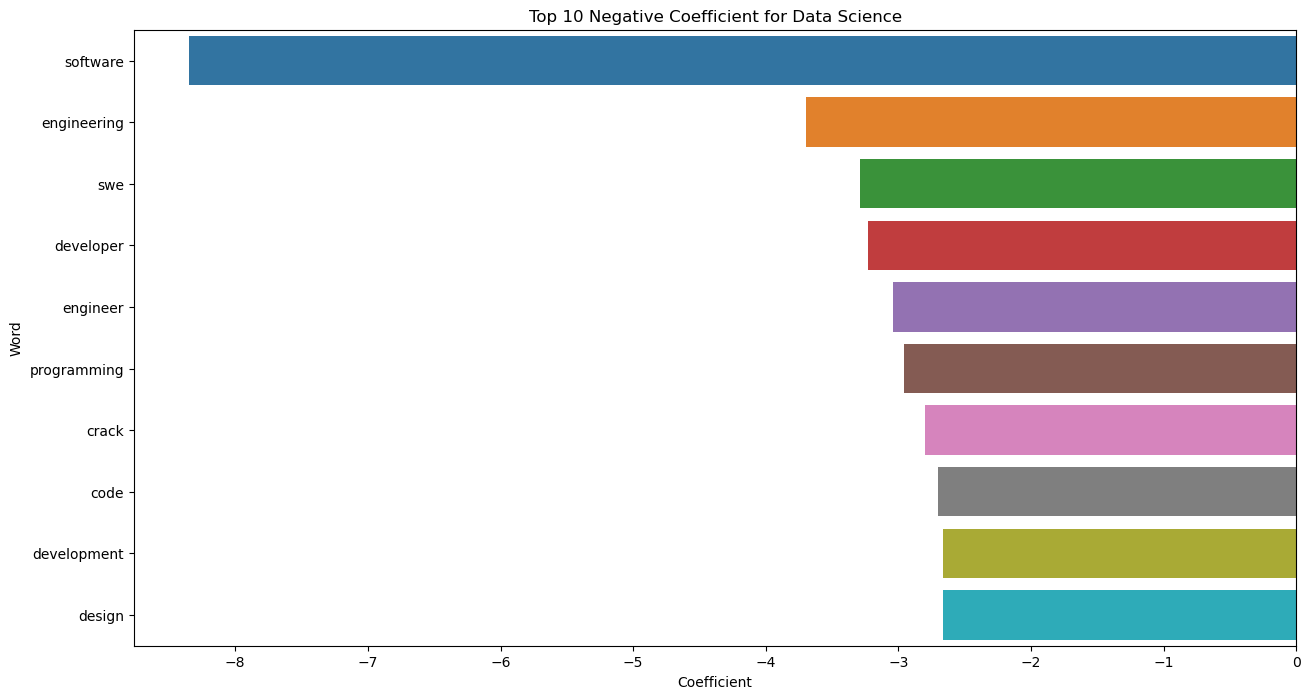

In [59]:
plt.figure(figsize = (15, 8))
sns.barplot(x = features_bot_coef.coefficient, y = features_bot_coef.index)
plt.title('Top 10 Negative Coefficient for Data Science')
plt.xlabel('Coefficient')
plt.ylabel('Word')
plt.savefig('../graphs/bot_10_coef');

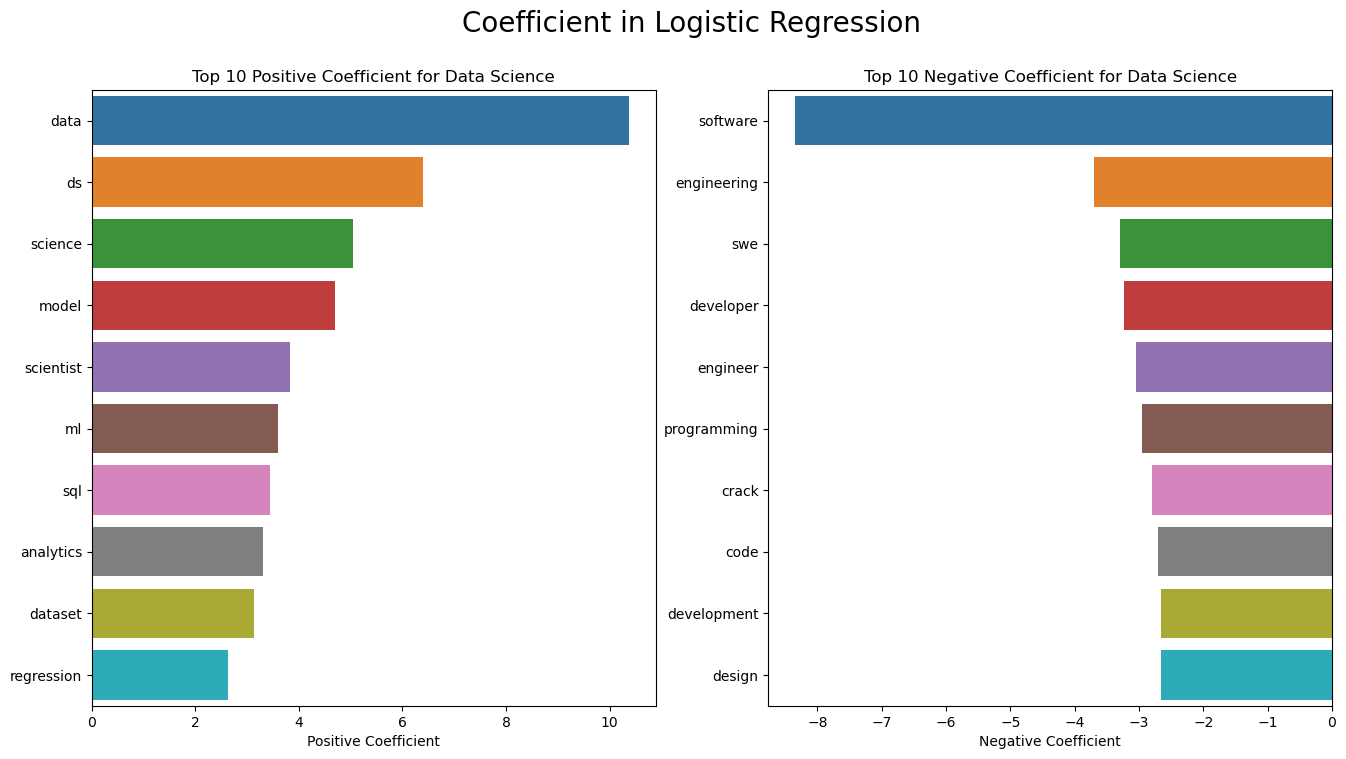

In [60]:
# Create two graph in one figure
fig, ax = plt.subplots(1, 2, figsize = (16, 8))

sns.barplot(x = features_top_coef.coefficient, y = features_top_coef.index, ax = ax[0])
sns.barplot(x = features_bot_coef.coefficient, y = features_bot_coef.index, ax = ax[1])

ax[0].set(title = 'Top 10 Positive Coefficient for Data Science', xlabel = 'Positive Coefficient')
ax[1].set(title = 'Top 10 Negative Coefficient for Data Science', xlabel = 'Negative Coefficient')

fig.suptitle('Coefficient in Logistic Regression', fontsize = 20)
plt.savefig(f'../graphs/coef.png');

### Use NB model with CountVectorize and TfidfVectorize

In [61]:
# Create Pipeline for model building
pipe_mnb = Pipeline(steps = [
    ('vec', CountVectorizer()),
    ('model', MultinomialNB())
])

In [62]:
pipe_mnb_params = {
    'vec': [TfidfVectorizer(stop_words=lem_stopwords), CountVectorizer(stop_words=lem_stopwords)],
    # 'vec__stop_words': [lem_stopwords],
    'vec__ngram_range': [(1, 1), (2, 2)],
    'vec__max_features': [3000, 4000],
    'vec__min_df': [2, 5],
    'vec__max_df': [1.0, 0.8],
}

In [63]:
gs_mnb = GridSearchCV(pipe_mnb, 
                      param_grid = pipe_mnb_params,
                      cv = 5,
                      verbose = 1,
                      # n_jobs = -1
                     )

In [64]:
gs_mnb.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vec', CountVectorizer()),
                                       ('model', MultinomialNB())]),
             param_grid={'vec': [TfidfVectorizer(stop_words=['i', 'me', 'my',
                                                             'myself', 'we',
                                                             'our', 'ours',
                                                             'ourselves', 'you',
                                                             "you're", "you've",
                                                             "you'll", "you'd",
                                                             'your', 'yours',
                                                             'yourself',
                                                             'yourselves', 'he',
                                                             'him', 'his',
                                                             'him

In [65]:
gs_mnb.best_estimator_

Pipeline(steps=[('vec',
                 CountVectorizer(max_features=4000, min_df=2,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'it', 'itself', ...])),
                ('model', MultinomialNB())])

In [66]:
gs_mnb.best_params_

{'vec': CountVectorizer(max_features=4000, min_df=2,
                 stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                             'ourselves', 'you', "you're", "you've", "you'll",
                             "you'd", 'your', 'yours', 'yourself', 'yourselves',
                             'he', 'him', 'his', 'himself', 'she', "she's",
                             'her', 'hers', 'herself', 'it', "it's", 'it',
                             'itself', ...]),
 'vec__max_df': 1.0,
 'vec__max_features': 4000,
 'vec__min_df': 2,
 'vec__ngram_range': (1, 1)}

In [67]:
gs_mnb.best_score_

0.8385134856057166

In [68]:
gs_mnb.score(X_train, y_train), gs_mnb.score(X_test, y_test)

(0.8660487095601599, 0.8340147179067866)

In [69]:
mnb_preds = gs_mnb.predict(X_test)

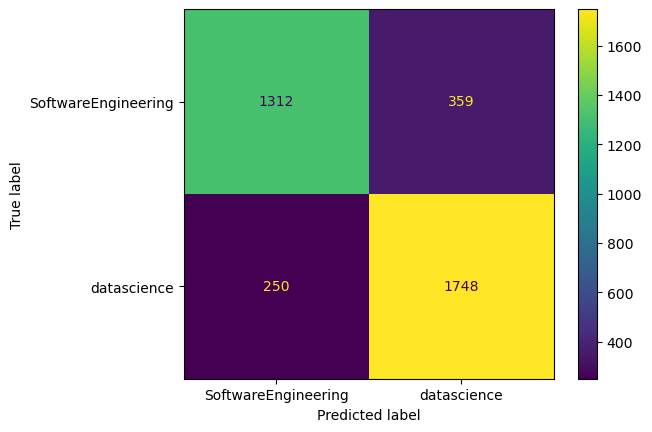

In [70]:
ConfusionMatrixDisplay.from_estimator(gs_mnb, X_test, y_test);

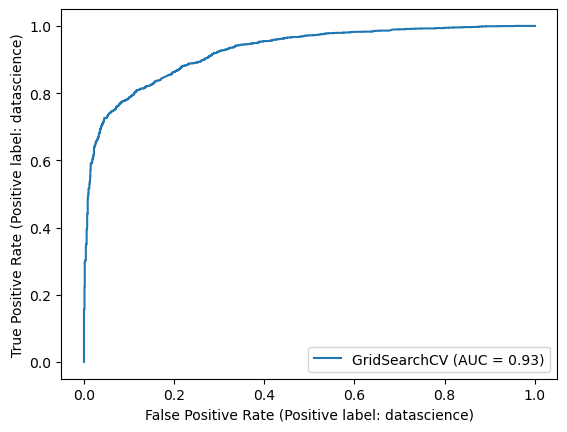

In [71]:
RocCurveDisplay.from_estimator(gs_mnb, X_test, y_test);

### Use Random Forest with CountVectorize and TfidfVectorize

In [72]:
# Create Pipeline for model building
pipe_rf = Pipeline(steps = [
    ('vec', CountVectorizer()),
    ('model', RandomForestClassifier())
])

In [73]:
pipe_rf.get_params()

{'memory': None,
 'steps': [('vec', CountVectorizer()), ('model', RandomForestClassifier())],
 'verbose': False,
 'vec': CountVectorizer(),
 'model': RandomForestClassifier(),
 'vec__analyzer': 'word',
 'vec__binary': False,
 'vec__decode_error': 'strict',
 'vec__dtype': numpy.int64,
 'vec__encoding': 'utf-8',
 'vec__input': 'content',
 'vec__lowercase': True,
 'vec__max_df': 1.0,
 'vec__max_features': None,
 'vec__min_df': 1,
 'vec__ngram_range': (1, 1),
 'vec__preprocessor': None,
 'vec__stop_words': None,
 'vec__strip_accents': None,
 'vec__token_pattern': '(?u)\\b\\w\\w+\\b',
 'vec__tokenizer': None,
 'vec__vocabulary': None,
 'model__bootstrap': True,
 'model__ccp_alpha': 0.0,
 'model__class_weight': None,
 'model__criterion': 'gini',
 'model__max_depth': None,
 'model__max_features': 'auto',
 'model__max_leaf_nodes': None,
 'model__max_samples': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_

In [74]:
pipe_rf_params = {
    'vec': [TfidfVectorizer(stop_words = lem_stopwords, ngram_range = (1, 1)), 
            CountVectorizer(stop_words = lem_stopwords, ngram_range = (1, 1))],
    # 'vec__stop_words': [lem_stopwords],
    # 'vec__ngram_range': [(1, 1), (2, 2)],
    'vec__max_features': [3000, 4000],
    'vec__min_df': [2, 5],
    # 'vec__max_df': [1.0, 0.8],
    'model__max_depth': [10, 30],
    'model__n_estimators': [100, 200],
    'model__min_samples_split': [2, 10],
    'model__min_samples_leaf': [1, 5]
}

In [75]:
gs_rf = GridSearchCV(pipe_rf, 
                      param_grid = pipe_rf_params,
                      cv = 5,
                      verbose = 1,
                      # n_jobs = -1
                     )

In [76]:
gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vec', CountVectorizer()),
                                       ('model', RandomForestClassifier())]),
             param_grid={'model__max_depth': [10, 30],
                         'model__min_samples_leaf': [1, 5],
                         'model__min_samples_split': [2, 10],
                         'model__n_estimators': [100, 200],
                         'vec': [TfidfVectorizer(stop_words=['i', 'me', 'my',
                                                             'myself', 'we',
                                                             'our', 'ours',
                                                             'ourselves', 'you',
                                                             "you're", "yo...
                                                             'itself', ...]),
                                 CountVectorizer(max_features=4000, min_df=5,
                                                 stop

In [77]:
gs_rf.best_estimator_

Pipeline(steps=[('vec',
                 CountVectorizer(max_features=4000, min_df=5,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'it', 'itself', ...])),
                ('model',
                 RandomForestClassifier(max_depth=30, min_samples_split=10,
                                        n_estimators=200))])

In [78]:
gs_rf.best_params_

{'model__max_depth': 30,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 10,
 'model__n_estimators': 200,
 'vec': CountVectorizer(max_features=4000, min_df=5,
                 stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                             'ourselves', 'you', "you're", "you've", "you'll",
                             "you'd", 'your', 'yours', 'yourself', 'yourselves',
                             'he', 'him', 'his', 'himself', 'she', "she's",
                             'her', 'hers', 'herself', 'it', "it's", 'it',
                             'itself', ...]),
 'vec__max_features': 4000,
 'vec__min_df': 5}

In [79]:
gs_rf.best_score_

0.8254294742059395

In [80]:
gs_rf.score(X_train, y_train), gs_rf.score(X_test, y_test)

(0.8679571065067249, 0.8255655491959663)

In [81]:
rf_preds = gs_rf.predict(X_test)

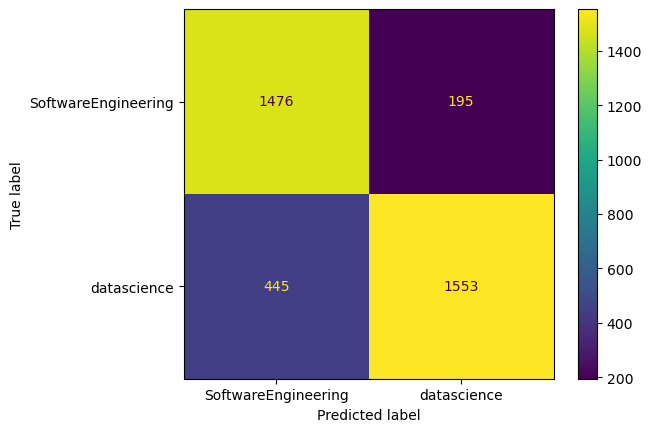

In [82]:
ConfusionMatrixDisplay.from_estimator(gs_rf, X_test, y_test);

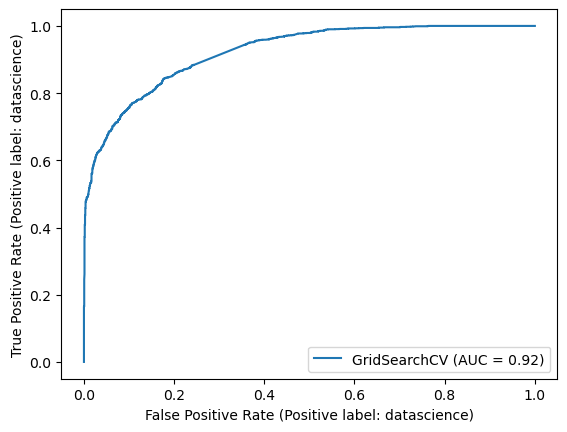

In [83]:
RocCurveDisplay.from_estimator(gs_rf, X_test, y_test);

In [84]:
# Find the most importance words from Random Forest

In [85]:
best_rf = gs_rf.best_estimator_.named_steps['model']

In [86]:
best_vec = gs_rf.best_estimator_.named_steps['vec']

In [87]:
importances = best_rf.feature_importances_

In [88]:
feature_names = best_vec.get_feature_names_out()

In [89]:
features = pd.DataFrame(importances, index = feature_names, columns = ['importance_ratio'])

In [90]:
features.head()

,importance_ratio
00,7.306872e-06
000,9.361295e-05
01,7.038895e-08
02,5.165150e-06
03,3.075964e-05


In [91]:
features_top_importance = features.sort_values('importance_ratio', ascending = False)[: 20]

features_top_importance

,importance_ratio
data,0.156307
software,0.098691
science,0.075173
scientist,0.028142
engineer,0.027685
engineering,0.025640
ds,0.021581
model,0.020268
analytics,0.012407
analyst,0.012216


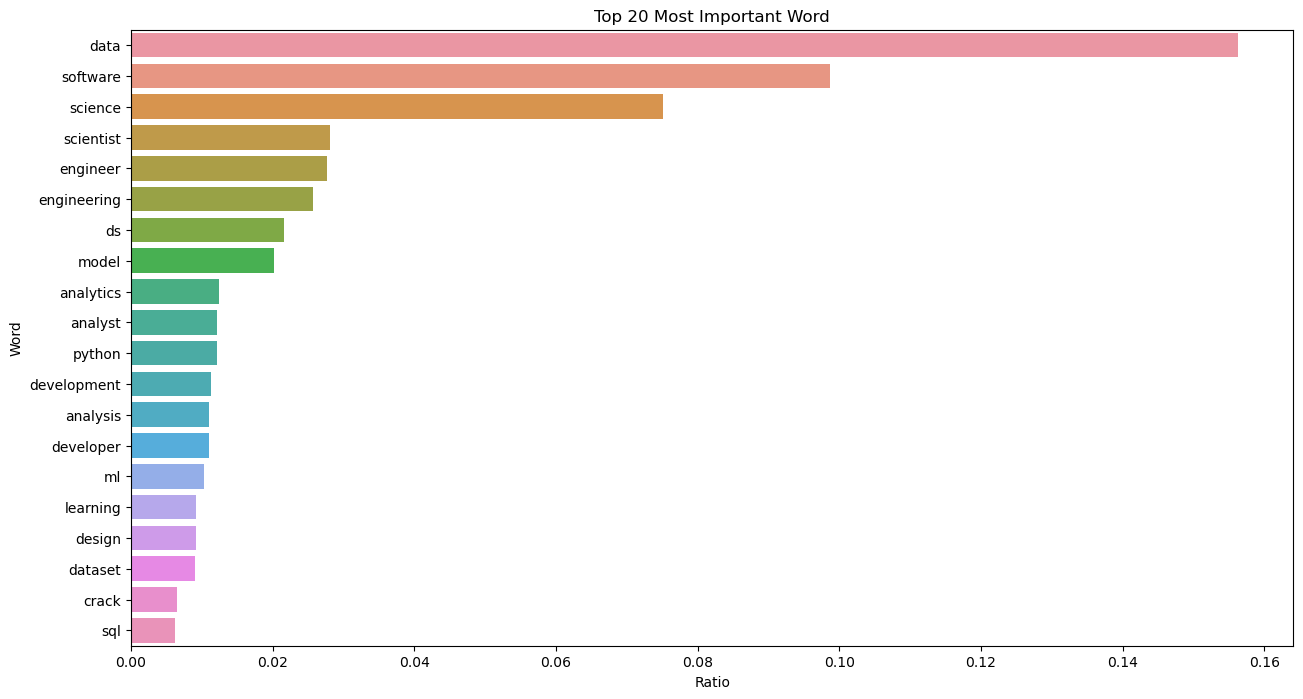

In [92]:
plt.figure(figsize = (15, 8))
sns.barplot(x = features_top_importance.importance_ratio, y = features_top_importance.index)
plt.title('Top 20 Most Important Word')
plt.xlabel('Ratio')
plt.ylabel('Word')
plt.savefig('../graphs/top_20_importance_word');

# Ensemble the three classifiers to get a better prediction

### Weighted Averaging

In [93]:
preds = pd.DataFrame({'lgr_preds': lgr_preds, 'mnb_preds': mnb_preds, 'rf_preds': rf_preds}, index = y_test.index)

preds

,lgr_preds,mnb_preds,rf_preds
2758,datascience,datascience,datascience
13752,SoftwareEngineering,SoftwareEngineering,SoftwareEngineering
1518,datascience,datascience,datascience
14093,SoftwareEngineering,SoftwareEngineering,SoftwareEngineering
13771,SoftwareEngineering,SoftwareEngineering,SoftwareEngineering
...,...,...,...
5041,SoftwareEngineering,SoftwareEngineering,SoftwareEngineering
13376,datascience,datascience,datascience
4403,SoftwareEngineering,SoftwareEngineering,SoftwareEngineering
2235,datascience,datascience,datascience


In [94]:
for c in preds.columns:
    preds[c] = preds[c].map({'datascience': 1, 'SoftwareEngineering': 0})

In [95]:
preds

,lgr_preds,mnb_preds,rf_preds
2758,1,1,1
13752,0,0,0
1518,1,1,1
14093,0,0,0
13771,0,0,0
...,...,...,...
5041,0,0,0
13376,1,1,1
4403,0,0,0
2235,1,1,1


In [96]:
probs = preds.mean(axis = 1)

probs

2758     1.000000
13752    0.000000
1518     1.000000
14093    0.000000
13771    0.000000
           ...   
5041     0.000000
13376    1.000000
4403     0.000000
2235     1.000000
7909     0.333333
Length: 3669, dtype: float64

In [97]:
preds['en_preds'] = (probs >= (2 / 3)).astype(int)

In [98]:
preds

,lgr_preds,mnb_preds,rf_preds,en_preds
2758,1,1,1,1
13752,0,0,0,0
1518,1,1,1,1
14093,0,0,0,0
13771,0,0,0,0
...,...,...,...,...
5041,0,0,0,0
13376,1,1,1,1
4403,0,0,0,0
2235,1,1,1,1


In [99]:
preds['en_preds'].map({1: 'datascience', 0: 'SoftwareEngineering'})

2758             datascience
13752    SoftwareEngineering
1518             datascience
14093    SoftwareEngineering
13771    SoftwareEngineering
                ...         
5041     SoftwareEngineering
13376            datascience
4403     SoftwareEngineering
2235             datascience
7909     SoftwareEngineering
Name: en_preds, Length: 3669, dtype: object

In [100]:
metrics.accuracy_score(y_test, preds['en_preds'].map({1: 'datascience', 0: 'SoftwareEngineering'}))

0.8465521940583265

### Stacking

In [104]:
stacking = StackingClassifier(
    estimators = [
        ('by', gs_mnb.best_estimator_),
        ('rf', gs_rf.best_estimator_)
    ],
    final_estimator=LogisticRegression() 
)

In [106]:
stacking.fit(X_train, y_train)

StackingClassifier(estimators=[('by',
                                Pipeline(steps=[('vec',
                                                 CountVectorizer(max_features=4000,
                                                                 min_df=2,
                                                                 stop_words=['i',
                                                                             'me',
                                                                             'my',
                                                                             'myself',
                                                                             'we',
                                                                             'our',
                                                                             'ours',
                                                                             'ourselves',
                                                                      

In [107]:
stacking.score(X_train, y_train), stacking.score(X_test, y_test)

(0.8801344965467103, 0.8479149632052331)

In [110]:
# Create accuracy tables for slides
acc = pd.DataFrame({'accuracy': [0.843, 0.834, 0.822, 0.846, 0.847]}, 
                   index = ['Logistic Regression', 'Multiple Naive Bayes', 'Random Forest', 'Weighted Averaging', 'Stacking'])

In [111]:
acc

,accuracy
Logistic Regression,0.843
Multiple Naive Bayes,0.834
Random Forest,0.822
Weighted Averaging,0.846
Stacking,0.847
